In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
Tcmb = 2.72e6
ntype = 'base'
ntype = 'base_roll50'

In [3]:
p = {}
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
for t, lmax in [('sa',2048),('la',4096)]:
#for t, lmax in [('la',4096)]:
    for nu in ['93','145','225','com']:
        p[t+nu] = prjlib.analysis_init(t=t,freq=nu,ntype=ntype)
        print('loading from',p[t+nu].fcmb.scl['o'])
        l, TT[t+nu], EE[t+nu], BB[t+nu] = np.loadtxt(p[t+nu].fcmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+nu], EN[t+nu], BN[t+nu] = np.loadtxt(p[t+nu].fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
pid = prjlib.analysis_init(t='id',ntype='cv')
l, TT['id'], EE['id'], BB['id'] = np.loadtxt(pid.fcmb.scl['o'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,2048,2049)
s = l*(l+1.)*Tcmb**2/2./np.pi
lTT = p['lacom'].lTT

loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa93_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa145_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sa225_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la93_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la145_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/la225_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_base_roll50_mv3_a5.0deg_none_o.dat


In [4]:
# analytic noise
NT, NE, NB = prjlib.nlofficial(deproj=-1,cols=(3,4,5,6))

Temperature

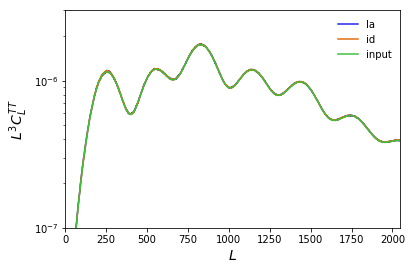

In [5]:
# TT
pl.plot_1dstyle(xmin=2,xmax=2048,ylab='$L^3C_L^{TT}$',ylog=True,ymin=1e-7,ymax=3e-6)
#plot(L,L**3*TT['sa93'],label='sa')
plot(l,l**3*TT['la145'],label='la')
plot(l,l**3*TT['id'],label='id')
plot(l,l**3*lTT[:lmax+1],label='input')
legend()

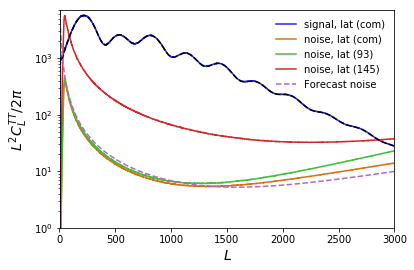

In [6]:
pl.plot_1dstyle(xmin=2,xmax=3000,ylab='$L^2C_L^{TT}/2\pi$',ylog=True,ymin=1.,ymax=7e3)
plot(l,s*TT['lacom'],label='signal, lat (com)')
plot(l,s*TN['lacom'],label='noise, lat (com)')
plot(l,s*TN['la93'],label='noise, lat (93)')
plot(l,s*TN['la145'],label='noise, lat (145)')
plot(l,s*lTT[:lmax+1],'k--')
plot(l,s*NT[:lmax+1]/Tcmb**2,'--',label='Forecast noise')
legend(loc=0)

Polarization

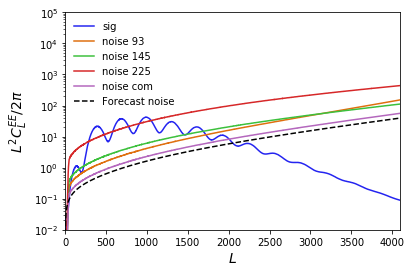

In [7]:
# EE + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{EE}/2\pi$',ylog=True,ymin=1e-2,ymax=1e5)
for nu in ['93','145','225','com']:
    if nu=='93':  plot(l,s*EE['la'+nu],label='sig')
    plot(l,s*EN['la'+nu],label='noise '+nu)
plot(l,s*NB[:lmax+1]/Tcmb**2,'k--',label='Forecast noise')
legend()

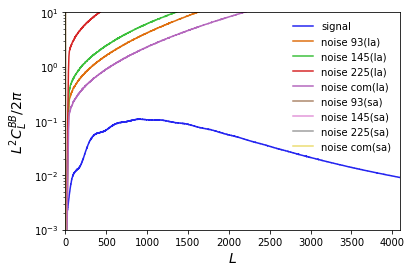

In [10]:
# BB + noise
pl.plot_1dstyle(xmin=2,xmax=4096,ylab='$L^2C_L^{BB}/2\pi$',ylog=True,ymin=1e-3,ymax=1e1)
for t, l0 in [('la',l),('sa',L)]:
    for nu in ['93','145','225','com']:
        if t=='la' and nu=='93':  plot(l,s*BB[t+nu],label='signal')
        plot(l0,l0*(l0+1.)*BN[t+nu]/2./np.pi*Tcmb**2,label='noise '+nu+'('+t+')')
legend()